# Principal component analysis (PCA)

### Part 1

In [111]:
# Import the desired libraries:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [2]:
#We analyze 15 samples  with 2 distinct characteristics g1, g2. 
#     m1 m2 m3 m4 m5 m6 m7 m8 m9 m10 m11 m12 m13 m14 m15
g1 = [10,11, 8, 3, 2, 1, 5, 6, 8, 10, 13, 12, 11, 15, 2]
g2 = [6,  4, 5, 3,2.8,1, 4, 7, 8,  4,  9,  8,  6, 10, 5]

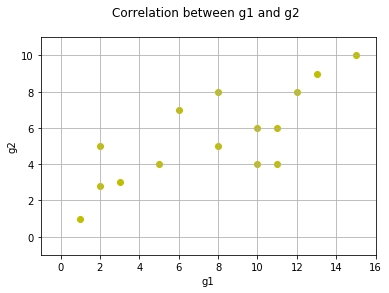

In [21]:
# This is possible to graph to see if there is a correlation. 
plt.scatter(g1,g2,c='y')
plt.title('Correlation between g1 and g2 \n')
plt.xlabel('g1')
plt.ylabel('g2')
plt.ylim(-1, max(g2)+1)
plt.xlim(-1, max(g1)+1)
plt.grid()
plt.show()

In [4]:
# In order to reduce the dimensionalty, we must follow a mathematical procedure. This will be done with  numpy:
g1=np.array(g1)
g2=np.array(g2)

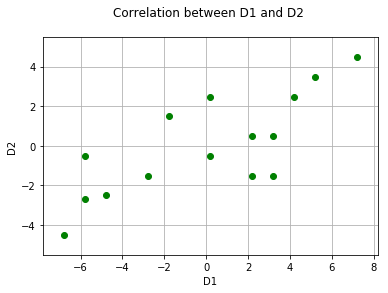

In [5]:
# To each element of g1 and g2 we must substract their corresponding mean, this will center the data into the plane,
# however it wont be modified.
D1 = g1-np.mean(g1)
D2 = g2-np.mean(g2)

plt.scatter(D1,D2,c='g')
plt.title('Correlation between D1 and D2 \n')
plt.xlabel('D1')
plt.ylabel('D2')
plt.ylim(min(D2)-1, max(D2)+1)
plt.xlim(min(D1)-1, max(D1)+1)
plt.grid()
plt.show()

In [6]:
# Now we can obtain the covariance matrix. This matrix tells the relation of expansion between variables
# if a number is bigger, the values of the components are more spread. The covariance matrix also tells
# how are the samples scattered (with a negative sign for a negative correlation, 0 if there is no
#correlation or a positive value for a positive correlation), this values are shown in the non-diagonal 
# elements.

cov_matrix = np.cov([g1,g2])

# This is the same as: cov_matrix = np.cov([D1,D2])
# We can tell there is a large variation on the values for g1, than for g2.
# (these values are located in the principal diagonal, and they tell the
# variance (spread) of the values in their respective axis)
cov_matrix

# It is important to note that this matrix is symetric, which will have important linear algebra properties

array([[19.6       ,  8.48285714],
       [ 8.48285714,  6.34171429]])

In [7]:
# Now we can obtain the eigenvalues and the corresponding eigenvectors for this matrix

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# The magnitude of Eigenvalues determine the importance of the eigenvector. The largest eigenvalue
# is the key for the eigenvector used, which will be the principal component! They indicate the "variance"
# on certain axis, the ones who have more variance are more distinguished that the ones that dont. 

# We can arbitrarily delete the smallest eigenvalues, because those contain small variance on each axis.
# this yields the dimension smaller!
print(f'eigenvalues are:{eigenvalues}')
print(f'The corresponding eigenvectors are:')
print('\n')


for i in range(len(eigenvalues)):
    print(f'For the eigenvalue {eigenvalues[i]}, the corresponding eigenvector is {eigenvectors.T[i]}\n')
#(The transpose of the eigenvalues must be obtained because the answer is shown as a column vector,
# so in order to obtain it, it is easier to transpose it and obtain the row.)

eigenvectors=eigenvectors.T

eigenvalues are:[23.73674774  2.20496655]
The corresponding eigenvectors are:


For the eigenvalue 23.736747738926315, the corresponding eigenvector is [0.89881985 0.43831824]

For the eigenvalue 2.2049665467879755, the corresponding eigenvector is [-0.43831824  0.89881985]



In [8]:
# To guarantee independence on each eigenvector, we can do the dot product, it must be zero:
np.dot(eigenvectors[0],eigenvectors[1])

0.0

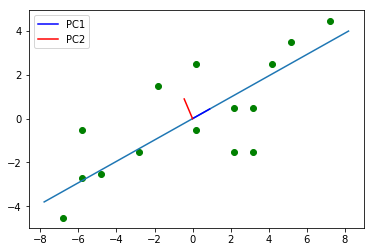

In [9]:
# Since we have created an eigenvector with the desired direction, we can generate a fuction with that solope
# Direction of the eigenvector with largest 
x = np.linspace(min(D1)-1,max(D1)+1,1000)

# Y =mx where m has the direction of the eigenvector
y = eigenvectors[0][1]/eigenvectors[0][0]*x


plt.scatter(D1,D2, c='g')
plt.plot(x,y)
# Principal component 1 direction
plt.plot([0,eigenvectors[0][0]], [0,eigenvectors[0][1]], c='b', label = 'PC1')

# Principal component 2 direction
plt.plot([0,eigenvectors[1][0]], [0,eigenvectors[1][1]], c='r', label= 'PC2')
plt.legend()
plt.show()

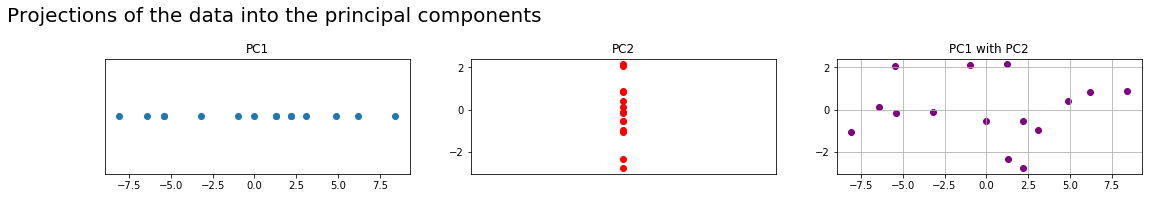

In [10]:
# Now it is possible to proyect the data into the new components, to do this, 
# it is necessary to generate an array for all the values as a matrix:

plt.subplot(131)
pc1_proyection = np.matmul(eigenvectors[0],np.array([D1,D2]))
plt.scatter(pc1_proyection,np.zeros(len(pc1_proyection)))
plt.yticks([])
plt.title('PC1')

plt.subplot(132)
pc2_proyection = np.matmul(eigenvectors[1],np.array([D1,D2]))
plt.scatter(np.zeros(len(pc1_proyection)),pc2_proyection,c='r')
plt.xticks([])
plt.title('PC2')

# If there is no reduction of the dimension
plt.subplot(133)
plt.scatter(pc1_proyection,pc2_proyection,c='purple')
plt.grid()
plt.title('PC1 with PC2')

plt.subplots_adjust(bottom=.4, top=.8, left=.1, right=2.5, hspace=1)

plt.suptitle('Projections of the data into the principal components \n\n', fontsize=(20))
plt.show()

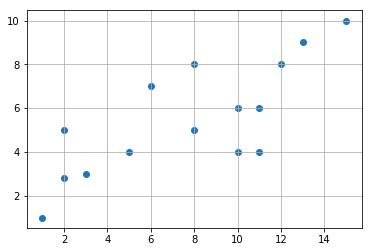

In [11]:
# Retrieve the information

# Retrieve only in D1 dispersion
retrieve_D1 = np.matmul([eigenvectors[0],[0,0]],[pc1_proyection,pc2_proyection])

# Retrieve only in D2 dispersion
retrieve_D2 = np.matmul([[0,0],eigenvectors[1]],[pc1_proyection,pc2_proyection])

# Retrieve all information:
retrieve = np.matmul(eigenvectors.T ,[pc1_proyection,pc2_proyection])
retrieve[0]+=np.mean(g1)
retrieve[1]+=np.mean(g2)
plt.grid()

plt.scatter(retrieve[0], retrieve[1])

### Part 2

In [12]:
# Now we can increase the number of dimensions adding another characteristic: g3
#     m1 m2 m3 m4 m5 m6 m7 m8 m9 m10 m11 m12 m13 m14 m15
g1 = [10,11, 8, 3, 2, 1, 5, 6, 8, 10, 13, 12, 11, 15, 2]
g2 = [6,  4, 5, 3,2.8,1, 4, 7, 8,  4,  9,  8,  6, 10, 5]
g3 = [2,  3, 4, 5, 4, 4, 3, 2, 3,  3,  4,  5,  4,  3, 4]

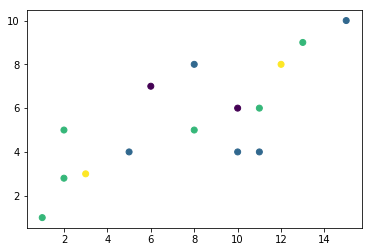

In [13]:
# Adding the other 'dimension' for the mice while plotting the other gene:
# By adding other gene, we need another dimension to represent the data
# this can be done spatially or it can be done with size or color
# we can use the former.
plt.scatter(g1,g2, c=g3)

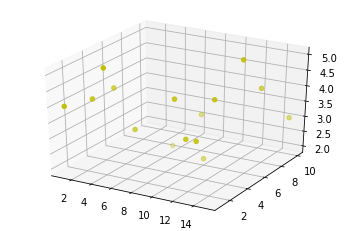

In [22]:
# However for a more intuitively visualization we can use aspatial representation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=g1, ys=g2, zs=g3, zdir='z', s=20, c='y', depthshade=True)
# (for more dimensions this will become complicated)

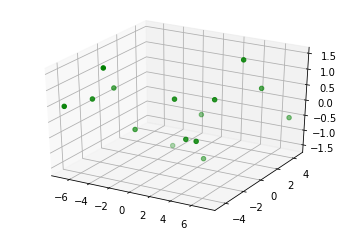

In [25]:
# We substract the mean of each data column to center the values:
D1= np.array(g1)-np.mean(g1)
D2= np.array(g2)-np.mean(g2)
D3= np.array(g3)-np.mean(g3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=D1, ys=D2, zs=D3, zdir='z', s=20, c='g', depthshade=True)

In [84]:
# We can now obtain the covariance matrix
cov_matrix = np.cov([D1,D2,D3])
cov_matrix
# we can see that in this covariance matrix, the other genome that was added
# had also a small variance, and it also contributed negatively
# (but with a low value) to the scattering of the values

array([[19.6       ,  8.48285714, -0.81428571],
       [ 8.48285714,  6.34171429, -0.45428571],
       [-0.81428571, -0.45428571,  0.83809524]])

In [96]:
# Now it is possible to determine the eigenvalues and eigenvectors

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


print(f'eigenvalues are:{eigenvalues}')
print(f'The corresponding eigenvectors are:')
print('\n')


for i in range(len(eigenvalues)):
    print(f'For the eigenvalue {eigenvalues[i]}, the corresponding eigenvector is {eigenvectors.T[i]}\n')
#(The transpose of the eigenvalues must be obtained because the answer is shown as a column vector,
# so in order to obtain it, it is easier to transpose it and obtain the row.)

eigenvectors=eigenvectors

eigenvalues are:[23.77453908  2.20684194  0.7984285 ]
The corresponding eigenvectors are:


For the eigenvalue 23.77453907760419, the corresponding eigenvector is [ 0.89803792  0.43804446 -0.04055802]

For the eigenvalue 2.2068419439728344, the corresponding eigenvector is [ 0.43944334 -0.89753012  0.03645866]

For the eigenvalue 0.7984285022325109, the corresponding eigenvector is [0.02043153 0.05056421 0.9985118 ]



In [97]:
# To guarantee the linear independence the dot product can be done:
print(np.dot(eigenvectors[0],eigenvectors[1]))
print(np.dot(eigenvectors[0],eigenvectors[2]))
print(np.dot(eigenvectors[1],eigenvectors[2]))

-3.187554387107383e-17
3.8163916471489756e-17
-2.7755575615628914e-17


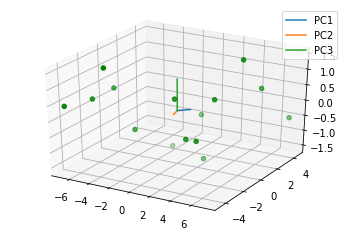

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=D1, ys=D2, zs=D3, zdir='z', s=20, c='g', depthshade=True)
ax.plot(xs=[0,eigenvectors[0][0]], ys=[0,eigenvectors[0][1]], zs=[0,eigenvectors[0][2]], label= 'PC1')
ax.plot(xs=[0,eigenvectors[1][0]], ys=[0,eigenvectors[1][1]], zs=[0,eigenvectors[1][2]], label= 'PC2')
ax.plot(xs=[0,eigenvectors[2][0]], ys=[0,eigenvectors[2][1]], zs=[0,eigenvectors[2][2]], label= 'PC3')
plt.legend()

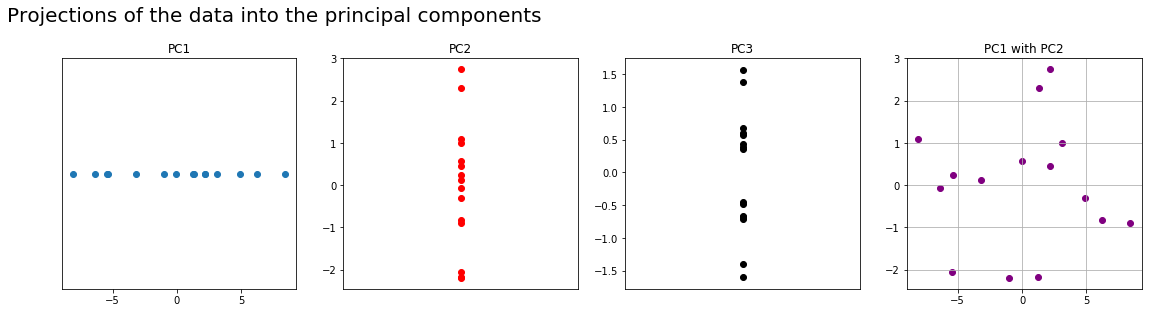

In [92]:
# Now it is possible to proyect the data into the new components, to do this, 
# it is necessary to generate an array for all the values as a matrix:

plt.subplot(141)
pc1_proyection = np.matmul(eigenvectors[0],np.array([D1,D2,D3]))
plt.scatter(pc1_proyection,np.zeros(len(pc1_proyection)))
plt.yticks([])
plt.title('PC1')


plt.subplot(142)
pc2_proyection = np.matmul(eigenvectors[1],np.array([D1,D2,D3]))
plt.scatter(np.zeros(len(pc2_proyection)),pc2_proyection,c='r')
plt.xticks([])
plt.title('PC2')

plt.subplot(143)
pc3_proyection = np.matmul(eigenvectors[2],np.array([D1,D2,D3]))
plt.scatter(np.zeros(len(pc2_proyection)),pc3_proyection,c='K')
plt.xticks([])
plt.title('PC3')

# If there is no reduction of the dimension
plt.subplot(144)
plt.scatter(pc1_proyection,pc2_proyection,c='purple')
plt.grid()
plt.title('PC1 with PC2')

plt.subplots_adjust(bottom=0, top=.8, left=0, right=2.5, hspace=1)

plt.suptitle('Projections of the data into the principal components \n\n', fontsize=(20))
plt.show()

In [ ]:
# Using statsmodels

In [ ]:
from statsmodels.multivariate.pca import PCA

In [100]:
# we create the dataframe
X_matrix = pd.DataFrame([g1,g2,g3]).T

In [118]:
ans = PCA(X_matrix, standardize=False, normalize=False, method='eig')

In [149]:
# Corroborate the eigenvecs
ans.eigenvecs

,eigenvec_0,eigenvec_1,eigenvec_2
0,-0.898038,-0.439443,0.020432
1,-0.438044,0.897530,0.050564
2,0.040558,-0.036459,0.998512


In [156]:
# Corroborate the eigenvalues
ans.eigenvals

0    332.843547
1     30.895787
2     11.177999
Name: eigenvals, dtype: float64

In [157]:
# the eigenvalues we obtained are a scaled factor of these ones
ans.eigenvals/14

0    23.774539
1     2.206842
2     0.798429
Name: eigenvals, dtype: float64

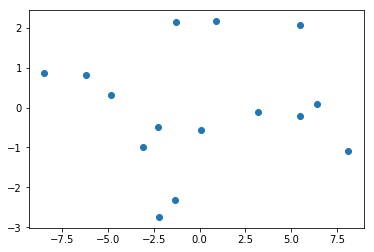

In [158]:
# The decision for the eigenvectors yields the rotaiton of the scatterplots
plt.scatter(ans.factors.comp_0,ans.factors.comp_1)